# Chapter 3 - IMDB Movie Reviews Binary Classification

In [1]:
import random
import numpy as np
from keras import Sequential
from keras.layers import Dense
from keras.datasets import imdb
from matplotlib import pyplot as plt
from keras.utils.vis_utils import plot_model

## Load Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

## Decode Reviews to English

In [3]:
def decode_to_english(sequence):

  word_index = imdb.get_word_index()
  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
  decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequence])
  
  return decoded_review

index = random.randint(0, len(train_data))
sequence = train_data[index]
decoded_sequence = decode_to_english(sequence = sequence)

print(f'Sequence: {sequence}\nDecoded Sequence: {decoded_sequence}')

Sequence: [1, 14, 20, 44, 107, 1122, 1094, 37, 385, 8, 2321, 19, 68, 223, 9, 43, 87, 10, 10, 12, 218, 35, 8161, 20, 13, 62, 135, 12, 287, 113, 17, 12, 9, 42, 16, 11, 4, 3352, 5, 2226, 54, 4, 293, 65, 304, 273, 4, 105, 26, 55, 327, 21, 28, 82, 49, 465, 3012, 51, 166, 25, 264, 15, 134, 26, 147, 4774, 87, 20, 19, 87, 156, 8, 123, 15, 113, 9, 24, 163, 32, 4, 58, 21, 15, 25, 70, 169, 2652, 19, 968, 5, 1797, 17, 4, 293, 109, 2, 62, 135]
Decoded Sequence: ? this movie about two italian brothers who came to germany with their family is just great br br it isn't an idealistic movie i would say it shows life as it is or was in the 60s and 70s when the main story takes place the characters are very nice but have also some dark sides what makes you believe that these are real persons great movie with great actors to show that life is not funny all the time but that you can find happiness with fire and passion as the main character ? would say


## Manual One-Hot-Encoding

In [4]:
def vectorize_sequence(sequences, dimension = 10000):  
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

## Build the Model

In [5]:
def build_model(dim):
  model = Sequential()

  # Add layers
  model.add(Dense(units = 16, activation = 'relu', input_shape = (dim, )))
  model.add(Dense(units = 16, activation = 'relu'))
  model.add(Dense(units = 1, activation = 'sigmoid'))

  # Compile model
  model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

  return model

In [6]:
def train_model(model, x_train, y_train, epochs, batch_size, validation_split):
  history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, validation_split = validation_split, verbose = 2)
  return history

## Graph Training Process

In [7]:
def plot(ax, history, metric):
  ax.set_title(f'{metric} per Epoch')
  ax.plot(history.history[metric], label = metric)
  ax.plot(history.history['val_' + metric], 'ro', label = f'Validation {metric}')
  ax.legend()  

## Evaluating the Model

In [8]:
def evaluate_model(model, x_test, y_test):
  results = model.evaluate(x_test, y_test, verbose = 0)
  return results

## Making Predictions

In [9]:
def predict(model, sequence):
  return model.predict(sequence)

## Wrap Up

In [10]:
# Vectorize training data
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

# Convert labels to numpy array
y_train = np.array(train_labels)
y_test = np.array(test_labels)

Epoch 1/3
30/30 - 18s - loss: 0.5239 - accuracy: 0.7768 - val_loss: 0.3918 - val_accuracy: 0.8638
Epoch 2/3
30/30 - 1s - loss: 0.3049 - accuracy: 0.9058 - val_loss: 0.3146 - val_accuracy: 0.8783
Epoch 3/3
30/30 - 1s - loss: 0.2223 - accuracy: 0.9259 - val_loss: 0.2823 - val_accuracy: 0.8882
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


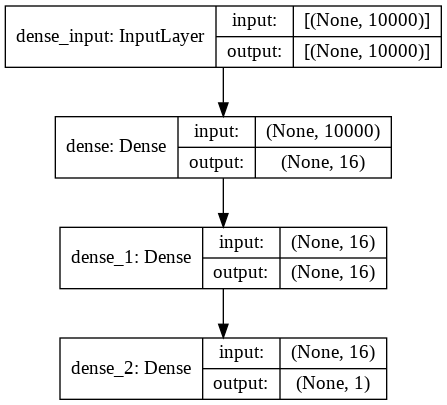

In [11]:
# Build and train the model
model = build_model(dim = x_train.shape[1])

history = train_model(
    model = model,
    x_train = x_train, 
    y_train = y_train,
    epochs = 3,
    batch_size = 512,
    validation_split = 0.4
)

model.summary()
plot_model(model, show_shapes = True)  

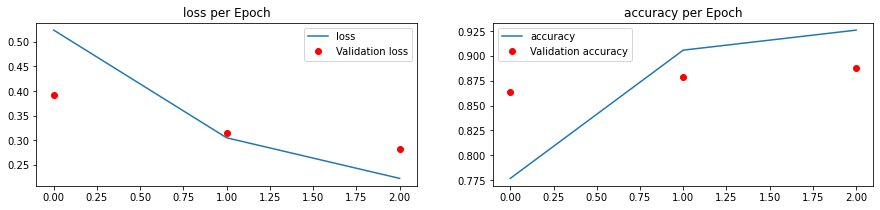

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (15, 3))

# Graph training process
plot(ax[0], history, 'loss')
plot(ax[1], history, 'accuracy')
plt.show()

In [13]:
# Evaluate the model
loss, acc = evaluate_model(model, x_test, y_test)
print(f'Loss: {round(loss, 2)}, Accuracy: {round(acc * 100, 2)}%')

Loss: 0.3, Accuracy: 88.28%


In [14]:
# Prediction
pred = predict(model, x_test[:1])[0, 0]

text = decode_to_english(test_data[0])
print('Text:', ' '.join(text.replace('?', '').split()))

if round(pred) == 1:
  print(f'POSITIVE ({round(pred * 100, 2)}%)')
else:
  print(f'NEGATIVE ({round((1 - pred) * 100, 2)}%)')

Text: please give this one a miss br br and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite so all you madison fans give this a miss
NEGATIVE (57.99%)
